# $$\textbf{Plummer sphere at equilibrium}$$

## <img src="treecode_Plummer_long_10000.gif" align="right" width="500px"/>

## Quick recap: 

The Plummer sphere has a density profile that goes as: 

$$\rho(r) = \frac{3M_{tot}}{4\pi b^2} \frac{1}{(1 + r^2/b^2)^{5/2}}$$

By integrating this, we get the following mass profile:

$$M(r) = \frac{r^3 M_{tot}}{b^3} \frac{1}{(1 + r^2/b^2)^{3/2}}$$

We can define:

$$\frac{M(r)}{M_{tot}} = c$$ 

where $c \in (0, 1)$ is the cumulative probability function $cdf(r)$

By inverting the function for $M(r)$ we find:
 
$$r = \frac{b}{({c^{-2/3}-1})^{1/2}}$$

The other two coordinates are the usual angular coordinates sampled in the spherical symmetry assumption: 

$$p(\phi) = \frac{1}{2\pi}$$

$$p(\theta) = \frac{\sin{\theta}}{2}$$

<br clear="right"/>

### Stability criteria: 

- If the system is at equilibrium we're not allowed to lose particles, wo their energy must always be < 0 in order to preserve their bound state; 

- The dispersion $\sigma$ is the same for all three directions due to isotropy and it's the min cause for stability, so we need to generate a velocity distribution that supports this constraint; 

- To sample this distribution we cannot use standard methods of reverting the integral result (non integrable :(!), so we use the rejection method to sample $q$ from which to extract the $v$ module: 

$$f(x)_{integral} = (1 - q^{2})^{7/2} q^{2}$$

We convert into $v$: 

$$v = q \cdot \sqrt{2 \Phi}$$

with $\Phi$ the potential at fixed $r$, $\sqrt{2 \Phi}$ the $\textit{escape velocity}$, and $q < 1$, indicating that $v < v_{esc}$. 

In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from tqdm.notebook import tqdm
from scipy.stats import uniform
%config InlineBackend.figure_format='retina'



###

## $${\textbf{Settings}}$$

In [2]:
# set initial parameters: 

N = int(1e4)
M = 1 
m = M / N
b = 1

In [3]:
def find_rs(b, N): 
    
    rad3_cb3 = (uniform.rvs(0, 1, size=N) * b**3)**(1/3)
    
    return rad3_cb3 / (1 - 1 / b**2 * rad3_cb3**2)**(1/2)

def find_pot(b, rs):
    
    return -1 * M / (b**2 + rs**2)**(1/2)

In [4]:
# generate the distribution: 

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

rays = find_rs(b, N)

In [5]:
#convert to cartesian

x = rays * np.sin(thetas) * np.cos(phis)
y = rays * np.sin(thetas) * np.sin(phis)
z = rays * np.cos(thetas) 

/var/folders/x1/_4_0wf6n3vbb18gn1psjd98w0000gn/T/ipykernel_43706/2092151786.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


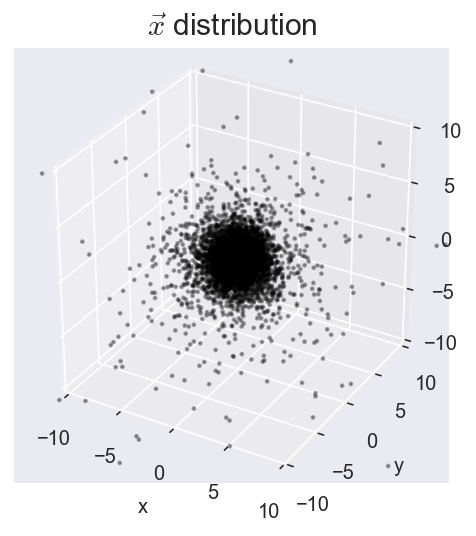

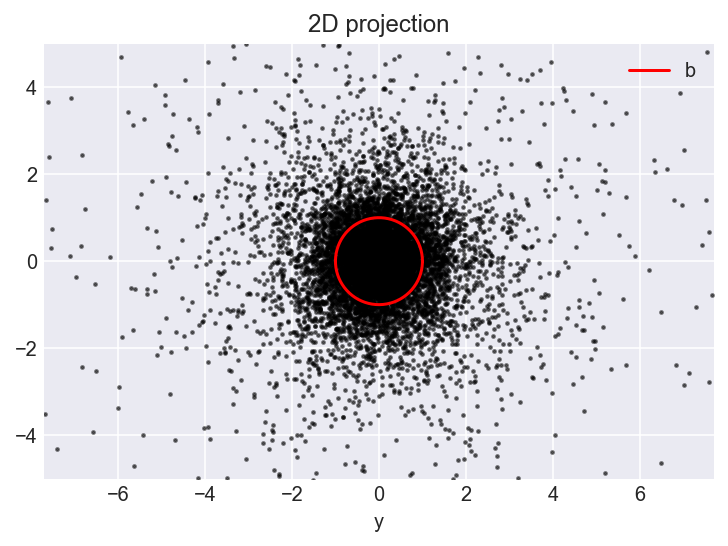

In [6]:
plt.style.use('seaborn-darkgrid')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = 'black', s=2, alpha=0.3)
ax.set_box_aspect([1,1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_title(r'$\vec{x}$ distribution', fontsize=15)
plt.show();

fig = plt.figure()
theta = np.linspace(0 , 2 * np.pi, 150)
a = b * np.cos(theta)
c = b * np.sin(theta)
plt.scatter(x,y, c='black', s=2, alpha=0.5)
plt.plot(a, c, c='red', label='b')
plt.axis('equal')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('x')
plt.xlabel('y')
plt.title('2D projection')
plt.legend();

### Potential

$$\Phi = -\frac{M}{(b^2+r^2)^{1/2}}$$

where $G = 1$

In [7]:
# evaluate the potential Phi:

Phis = find_pot(b, rays)

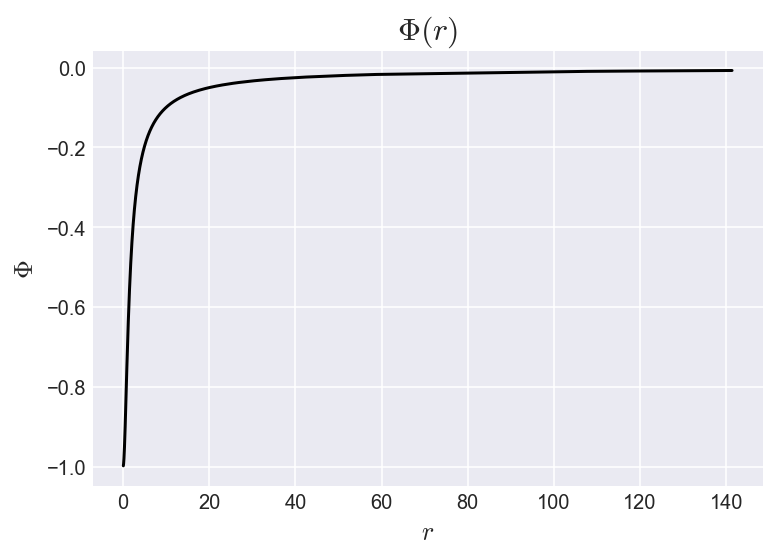

In [8]:
# plot:
plt.plot(rays[np.argsort(rays)], Phis[np.argsort(rays)], c='k')
plt.title(r"$\Phi(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel("$\Phi$", fontsize=13);
plt.show()

The relative potential is $\psi = \Phi + \Phi_0$, where I can decide to set $\Phi_0 = 0$ (initial potential).

### Escape velocity

$$v_{es} = \sqrt{2\psi}$$

In [9]:
# compute escape velocities: 

vs_esc = (2 * (-1 * Phis))**(1/2)

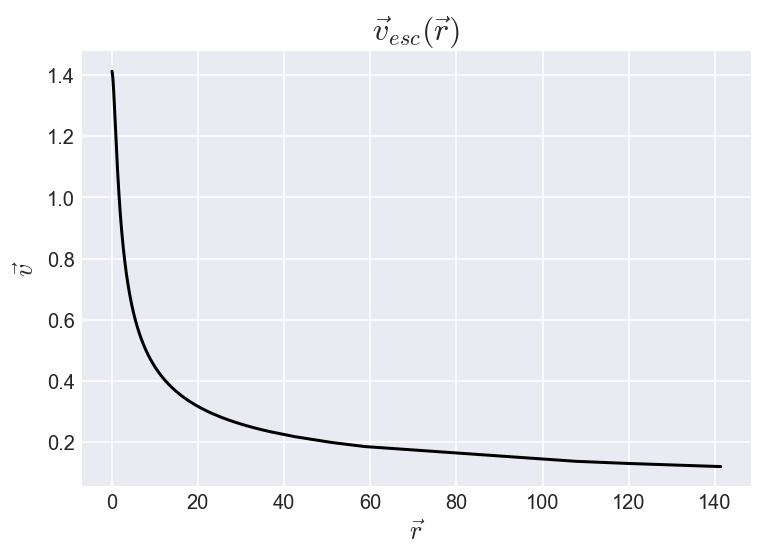

In [10]:
#plot: 
plt.plot(rays[np.argsort(rays)], vs_esc[np.argsort(rays)], c='k')
plt.title(r"$\vec{v}_{esc}(\vec{r})$", fontsize=16)
plt.xlabel(r"$\vec{r}$", fontsize=13)
plt.ylabel(r"$\vec{v}$", fontsize=13);
plt.show()

### $$v \ \ \text{sampling}$$

In [11]:
def integral_function(x): 
    
    return  512 / (7 * np.pi) * (1 - x**2)**(7/2) * x**2

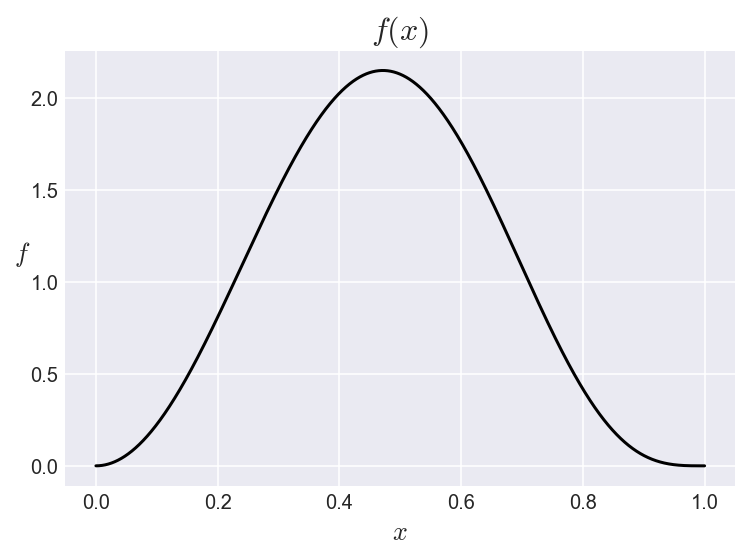

In [12]:
x_grid = np.linspace(0, 1, N)

plt.plot(x_grid, integral_function(x_grid), c='k')
plt.title("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$f$", fontsize=13, rotation=0);

In [13]:
def rejection_sampling(x, N):
    
    counts = 0
    y_i_ok = []
    
    while counts < N: 
    
        x_i = uniform.rvs(0, np.max(x))
        y_i = uniform.rvs(0, np.max(integral_function(x)))  # I generate the y_i points uniformly
    
        if y_i <= integral_function(x_i):
            
            y_i_ok.append(x_i)
            counts = counts + 1
            
        else: 
            continue
            
    return y_i_ok

In [14]:
y_i_ok = rejection_sampling(x_grid, N)

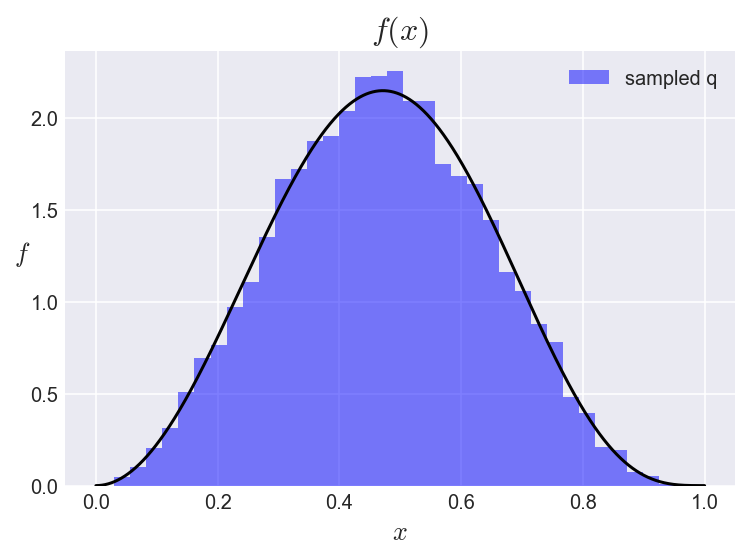

In [15]:
plt.figure()
plt.plot(x_grid, integral_function(x_grid), c='k')
plt.hist(y_i_ok, 35, density=True, color='blue', alpha=0.5, label='sampled q')
plt.title("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$f$", fontsize=13, rotation=0)
plt.legend();

In [16]:
vs = y_i_ok * vs_esc

In [17]:
# generate the velocities: 

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

vx = vs * np.sin(thetas) * np.cos(phis)
vy = vs * np.sin(thetas) * np.sin(phis)
vz = vs * np.cos(thetas)

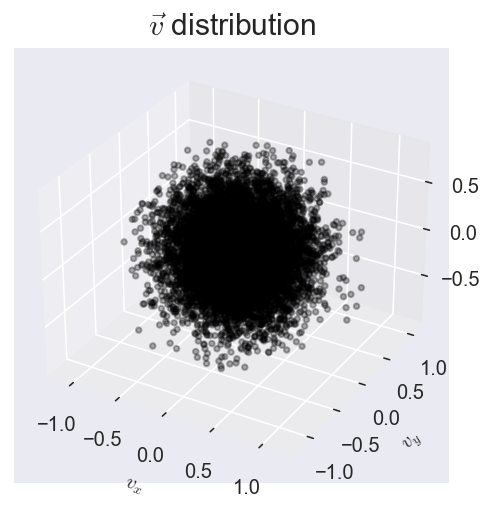

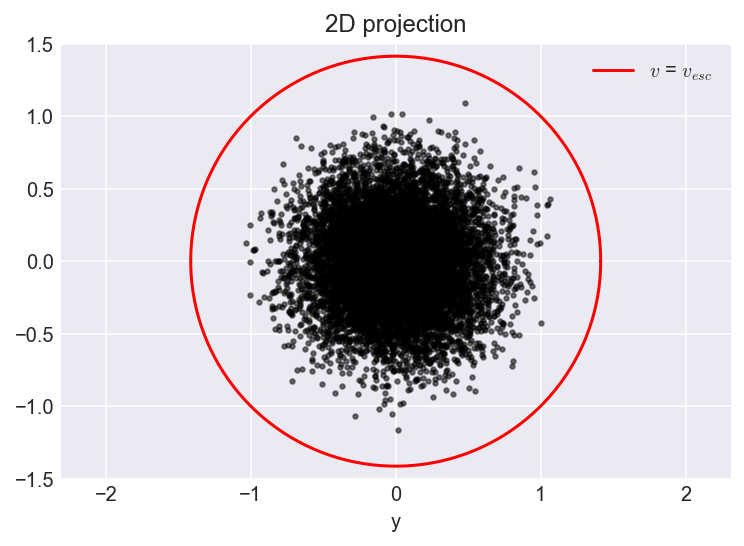

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(vx, vy, vz, c = 'black', s=7.5, alpha=0.3)
ax.set_aspect('equal')
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$v_z$')
ax.set_title(r'$\vec{v}$ distribution', fontsize=15)
#ax.set_xlim(-13, 13)
#ax.set_ylim(-13, 13)
#ax.set_zlim(-13, 13)
plt.show();


plt.figure()
a = np.sqrt(2) * np.cos( theta )  # 1 is v = v_esc
c = np.sqrt(2) * np.sin( theta )
plt.scatter(vx,vy, c='black', s=5, alpha=0.5)
plt.plot(a, c, c='red', label='$v$ = $v_{esc}$')
plt.axis('equal')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('x')
plt.xlabel('y')
plt.title('2D projection')
plt.legend();

### Produce input file

Let's try to simulate:

In [19]:
'''
# open the file
file = open('plummer_sphere.txt', 'w')

# write the file
file.write(f'{N}\n')
file.write('3\n') # dimensions
file.write('0\n')

for i in range(N):
    file.write(f'{m}\n')

for i in range(N):
    file.write(f'{x[i]} {y[i]} {z[i]}\n')
    
for i in range(N):
    file.write(f'{vx[i]} {vy[i]} {vz[i]}\n')

# close the file
file.close()
'''

"\n# open the file\nfile = open('plummer_sphere.txt', 'w')\n\n# write the file\nfile.write(f'{N}\n')\nfile.write('3\n') # dimensions\nfile.write('0\n')\n\nfor i in range(N):\n    file.write(f'{m}\n')\n\nfor i in range(N):\n    file.write(f'{x[i]} {y[i]} {z[i]}\n')\n    \nfor i in range(N):\n    file.write(f'{vx[i]} {vy[i]} {vz[i]}\n')\n\n# close the file\nfile.close()\n"

In [20]:
def dyn_time(rho_0): 
    
    G = 1
    
    return np.sqrt(3 * np.pi / (16 * G * rho_0)) 

def coll_time(rho_0): 
    
    G = 1
    
    return np.sqrt(3 * np.pi / (32 * G * rho_0))

In [21]:
V_0 = 4/3 * np.pi * b**3
numb_density = N/V_0 
rho_0 = M/V_0
print('dynamical time:', dyn_time(rho_0), '\n')

t_sim = 16*dyn_time(rho_0)

dtime = 0.01 # Timestep: roughly the total time of simulation / number of frames that we want
eps = (1/numb_density)**(1/3) # Softening: roughly the radius associated to each particle
theta = 0.1 
tstop = t_sim # Total time of the simulation
dtout = 0.1

command = f'time ./treecode in=plummer_sphere.txt out=output_plummer.txt dtime={dtime} eps={eps} theta={theta} tstop={tstop} dtout={dtout} >snapshot.txt ; echo Process returned$?'
print('Terminal command line:\n', command)

dynamical time: 1.5707963267948963 

Terminal command line:
 time ./treecode in=plummer_sphere.txt out=output_plummer.txt dtime=0.01 eps=0.0748220385363649 theta=0.1 tstop=25.13274122871834 dtout=0.1 >snapshot.txt ; echo Process returned$?


# $$\textbf{Data analysis}$$

In [22]:
def Dataframe(namefile): 
    df = pd.read_csv(namefile, names=('1', '2', '3'), sep='\s+', skipinitialspace=True)
    return df

data = Dataframe("output_plummer.txt")
num_rows = len(data.index)
rows_label = [0 for n in range(num_rows)]
step = 3*N+3

for i in np.arange(0, num_rows, step=step):
    rows_label[i] = '# Particles'
for i in np.arange(1, num_rows, step=step):
    rows_label[i] = 'Dimensions'
for i in np.arange(2, num_rows, step=step):
    rows_label[i] = 'Time'

for n in range(N): # from 0 to 1999
    for i in np.arange(n+3, num_rows, step=step): # da 3 alla fine del dataframe al primo ciclo (primo valore di n)
        rows_label[i] = str(n+1)+' - mass'

for n in range(N): # from 0 to 1999
    for i in np.arange(n+N+3, num_rows, step=step): # da 3 alla fine del dataframe al primo ciclo (primo valore di n)
        rows_label[i] = str(n+1)+' - pos'
        
for n in range(N): # from 0 to 1999
    for i in np.arange(n+2*N+3, num_rows, step=step): # da 3 alla fine del dataframe al primo ciclo (primo valore di n)
        rows_label[i] = str(n+1)+' - vel'

data.index = rows_label

display(data)

,1,2,3
# Particles,10000.000000,NaN,NaN
Dimensions,3.000000,NaN,NaN
Time,0.000000,NaN,NaN
1 - mass,0.000100,NaN,NaN
2 - mass,0.000100,NaN,NaN
...,...,...,...
9996 - vel,0.279173,0.092115,0.209517
9997 - vel,0.084862,0.243185,-0.211034
9998 - vel,-0.016550,0.044248,0.850576
9999 - vel,-0.205371,0.117645,-0.159527


In [23]:
#Slicing with the .iloc function
#NB: Notation is list[start:stop:step]

# Time #-----------------------------------------
Time = np.array(data.loc['Time', '1']).flatten()
print(f'The simulation consists in {len(Time)} time-steps.')

The simulation consists in 252 time-steps.


In [24]:
import os
from tqdm import tqdm
# Execute this cell just ONCE in order to put all the data in "position_list.txt", 
# so that the following analysis will be much much faster

pos_filename = 'position_list_long.txt'

if not os.path.exists(pos_filename):
    new_list = []
    for n in tqdm(range(1, N+1)):
        new_list.append((data.loc[str(n)+' - pos', '1'], 
                data.loc[str(n)+' - pos', '2'], 
                data.loc[str(n)+' - pos', '3'])) 
    np_list = np.array(new_list)
    list_reshaped = np_list.reshape(np_list.shape[0], -1)
    np.savetxt(pos_filename, list_reshaped)
else:
    print(f'"{pos_filename}" already exists in the folder!')

"position_list_long.txt" already exists in the folder!


In [25]:
# -------------------------- Loading the positions from the file --------------------------

load_list = np.loadtxt(pos_filename)
load_original_list = load_list.reshape(
    load_list.shape[0], load_list.shape[1] // len(Time), len(Time))

print(f'(# part., dim, t_steps) \n {np.shape(load_original_list)}')

_list = np.copy(load_original_list)

(# part., dim, t_steps) 
 (10000, 3, 252)


100%|████████████████████████████████████| 10000/10000 [00:11<00:00, 888.83it/s]


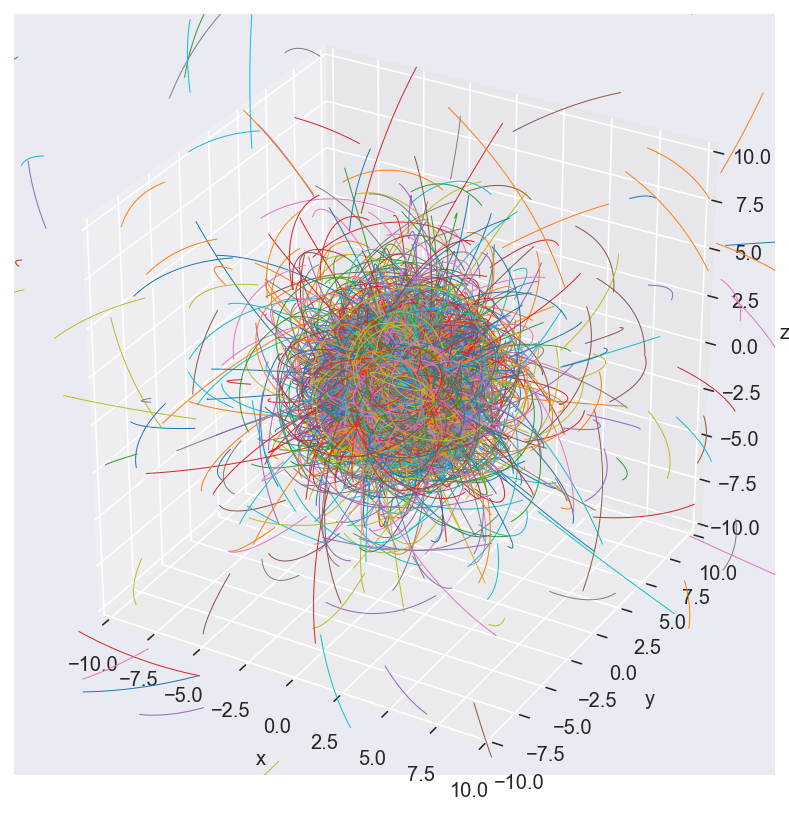

In [26]:
l=10

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-l, l)
ax.set_ylim(-l, l)
ax.set_zlim(-l, l)
ax.set_box_aspect([1,1,1])

for n in tqdm(range(N)):
    ax.plot(_list[n][0], _list[n][1], _list[n][2], linewidth=0.5) 

## Animation: (x, y, z)

### "Frame creation" function

In [27]:
def animate(i):
    m_1._offsets3d = (_list[:, 0, i:i+1].flatten(), _list[:, 1, i:i+1].flatten(), _list[:, 2, i:i+1].flatten())
#     m_2.set_data(x_cm_i[i:i+1], y_cm_i[i:i+1])
#     m_2.set_3d_properties(z_cm_i[i:i+1])
    ax.set_title('Plummer sphere at equilibrium \n Time = '+str("{:.1f}".format(Time[i]/dyn_time(rho_0)))+    
                 r' $T_{dyn}$    Number of points = '+str(N), fontsize=13)
    
    # Continuous rotation:
#     ax.view_init(elev=30, azim=i*(90/num_frames))


# The following part is used for rotation and/or zooming
"""
    if i<80:
        ax.view_init(elev=30, azim=45)
    elif i>=80 and i<=160:
#         ax.view_init(elev=30, azim=i*(90/(num_frames-80)))
        ax.set_xlim(-(10*(80/i)), (10*(80/i)))
        ax.set_ylim(-(10*(80/i)), (10*(80/i)))
        ax.set_zlim(-(10*(80/i)), (10*(80/i)))
    else:
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_zlim(-5, 5)
    return m_1, m_2
"""

'\n    if i<80:\n        ax.view_init(elev=30, azim=45)\n    elif i>=80 and i<=160:\n#         ax.view_init(elev=30, azim=i*(90/(num_frames-80)))\n        ax.set_xlim(-(10*(80/i)), (10*(80/i)))\n        ax.set_ylim(-(10*(80/i)), (10*(80/i)))\n        ax.set_zlim(-(10*(80/i)), (10*(80/i)))\n    else:\n        ax.set_xlim(-5, 5)\n        ax.set_ylim(-5, 5)\n        ax.set_zlim(-5, 5)\n    return m_1, m_2\n'

In [28]:

# ---------------------------------- Plot settings ------------------------------------------
a = 8 # x,y,z limit

plt.style.use('seaborn-darkgrid')
# %matplotlib notebook
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=30, azim=45) #Set initial camera view
fig.set_facecolor('white')

ax.set_xlim(-a, a)
ax.set_ylim(-a, a)
ax.set_zlim(-a, a)

ax.set_box_aspect([1,1,1])

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
# ax.text(x_cm_i[0]-1, y_cm_i[0]-1, z_cm_i[0]-1, 'CM', fontsize=10, c='black')

m_1 = ax.scatter([], [], [], c='red', 
                marker='.', s=3, alpha=0.8)

# This is for the CENTER OF MASS
m_2, = ax.plot([], [], [], c='black', 
                marker='.')

# ----------------------------------- Animation creation --------------------------------------

num_frames = len(Time)
# Create the animation with a frame step = 1 (it builds a frame out of every element of the _list)
frame_step = 1
animazione = animation.FuncAnimation(fig, animate, 
                                     frames=range(0, num_frames, frame_step), interval=1)


# ---------------------------------- Saving the animation --------------------------------------

dpi = 100
fps = 40
gif_filename = 'treecode_Plummer_long_bn_'+str(N)+'.gif'
writer = animation.writers['ffmpeg'](fps=fps)

if not os.path.exists(gif_filename):
    animazione.save(gif_filename, writer=writer,dpi=dpi)
else:
    print('## This animation gif already exists in the folder!')
    ans = input('Do you want to overwrite it? y/n: ')
    if ans == 'y':
        os.remove(gif_filename)
        animazione.save(gif_filename, writer=writer,dpi=dpi)
    elif ans == 'n':
        print("File untouched")
    else:
        print('Wrong answer')

plt.close(fig)

/var/folders/x1/_4_0wf6n3vbb18gn1psjd98w0000gn/T/ipykernel_43706/1842656158.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## This animation gif already exists in the folder!
Do you want to overwrite it? y/n: n
File untouched


### Computing initial density for shells of increasing radii

The density profile is: 

$$\rho(r) = \frac{3M_{tot}}{4\pi b^2} \frac{1}{(1 + r^2/b^2)^{5/2}}$$

In [29]:
def density_profile(rs):
    
    return 3 * M / (4 * np.pi * b**2) * 1 / (1 + rs**2 / b**2)**(5/2)

In [30]:
rs_grid = np.linspace(0.1, 5, 100)

rho_theor = density_profile(rs_grid)

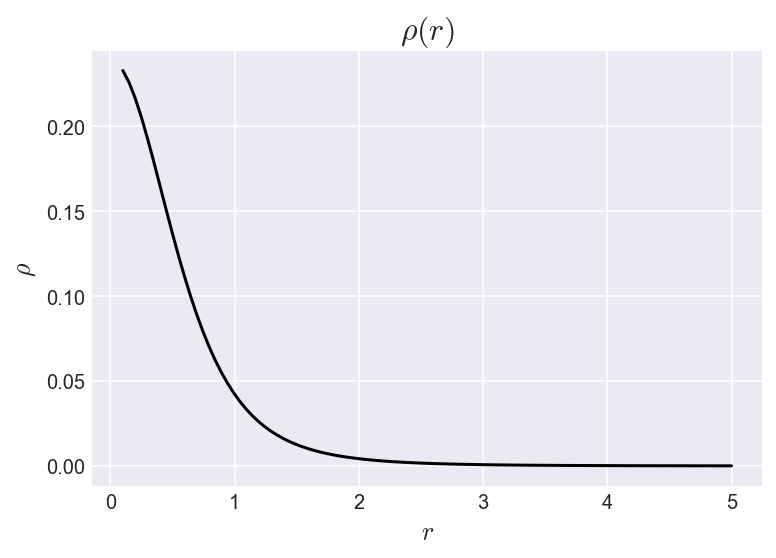

In [31]:
plt.plot(rs_grid, rho_theor, c='k')
plt.title(r"$\rho(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel(r"$\rho$", fontsize=13);
plt.show()

In [32]:
def density_estimator(r_min, r_max, r_t): 
    
    V = 4/3 * np.pi * (r_max**3 - r_min**3)
    N_particles = len(r_t[r_t < r_max]) - len(r_t[r_t < r_min])
    M_within = N_particles * m
    
    return M_within / V

In [33]:
R = [0.1, 0.2, 0.5, 0.9, 1, 1.5, 2, 3, 4, 5]

rho_0 = []

for i in range(0, len(R) -1):
    
    rho_0.append(density_estimator(R[i], R[i+1], rays))

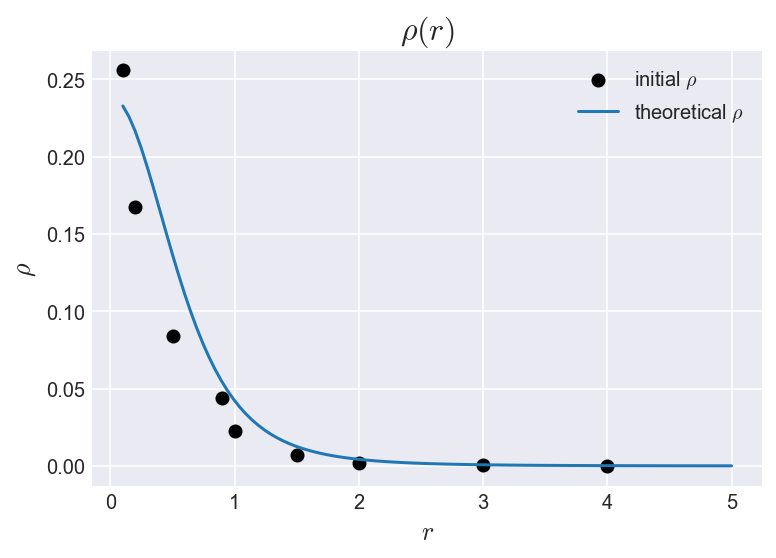

In [34]:
plt.scatter(R[:-1], rho_0, c='k', label=r'initial $\rho$')
plt.plot(rs_grid, rho_theor, c='C0', label=r'theoretical $\rho$')
plt.title(r"$\rho(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel(r"$\rho$", fontsize=13)
plt.legend();
plt.show()

In [35]:
def find_radii_t():
    
    r_times = []
    
    for t in range(0, len(Time)): 
        
        r_times.append([(_list[n][0][t]**2 + _list[n][1][t]**2 + _list[n][2][t]**2)**(1/2) for n in range(0, N)])
    
    return r_times

In [36]:
r_times = np.array(find_radii_t())

In [37]:
rho_t = [0] * len(Time)

for t in range(0, len(Time)):
    
    rho_t[t] = [density_estimator(R[i], R[i+1], r_times[:][t]) for i in range(0, len(R) - 1)]
    
                 

In [38]:
r_trs= np.transpose(rho_t)
means = []
std = []

for m in range(0, len(R) - 1):
    
    means.append(np.mean(r_trs[m]))

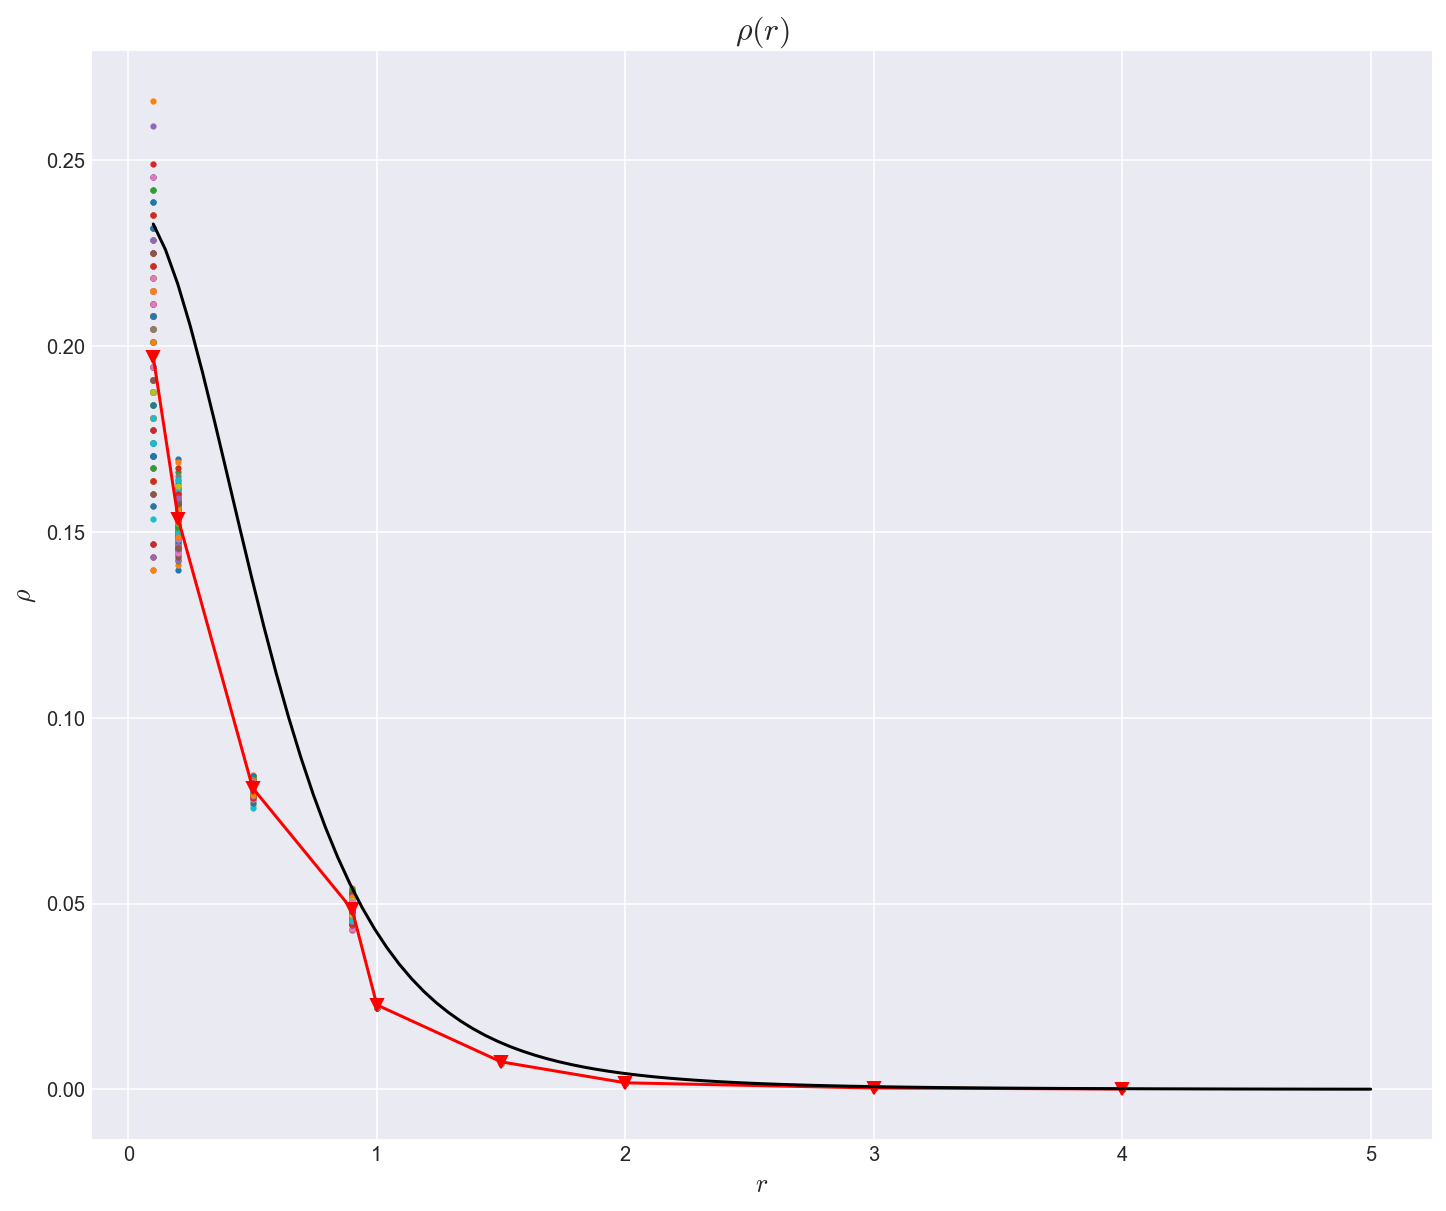

In [39]:
plt.figure(figsize=(12, 10))

for t in range(0, len(Time)):
    plt.scatter(R[:-1], rho_t[t], s=4.5)
    
plt.plot(R[:-1], means, marker='v', c='red')
    
plt.title(r"$\rho(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel(r"$\rho$", fontsize=13);
plt.plot(rs_grid, rho_theor, c='k')

plt.show()

This was f** correct: 

### Lagrangian radius evolution in time - Stability check

The Lagrangian radius is the radius from the centre at which we find 80% of the entire mass of our distribution. If the sphere is stable, then this quantity should be a constant. We decided to see how close we are to the actual radius 'fixed' at the beginning. We then evaluate the absolute deviation and derive the relative error. 

In [40]:
b_2 = []
b_4 = []
b_6 = []
b_8 = []

for i in range(len(Time)):
    a = np.sort(r_times[i])
    
    mask = a < np.quantile(a,0.2)
    b_2.append(np.max(a[mask]))
    
    mask = a < np.quantile(a,0.4)
    b_4.append(np.max(a[mask]))
    
    mask = a < np.quantile(a,0.6)
    b_6.append(np.max(a[mask]))
    
    mask = a < np.quantile(a,0.8)
    b_8.append(np.max(a[mask]))

In [41]:
# to find the lagrangian radius from theory

def lagr_th(b, quantile): 
    rad3_cb3 = (quantile * b**3)**(1/3)
    return rad3_cb3 / (1 - 1 / b**2 * rad3_cb3**2)**(1/2)

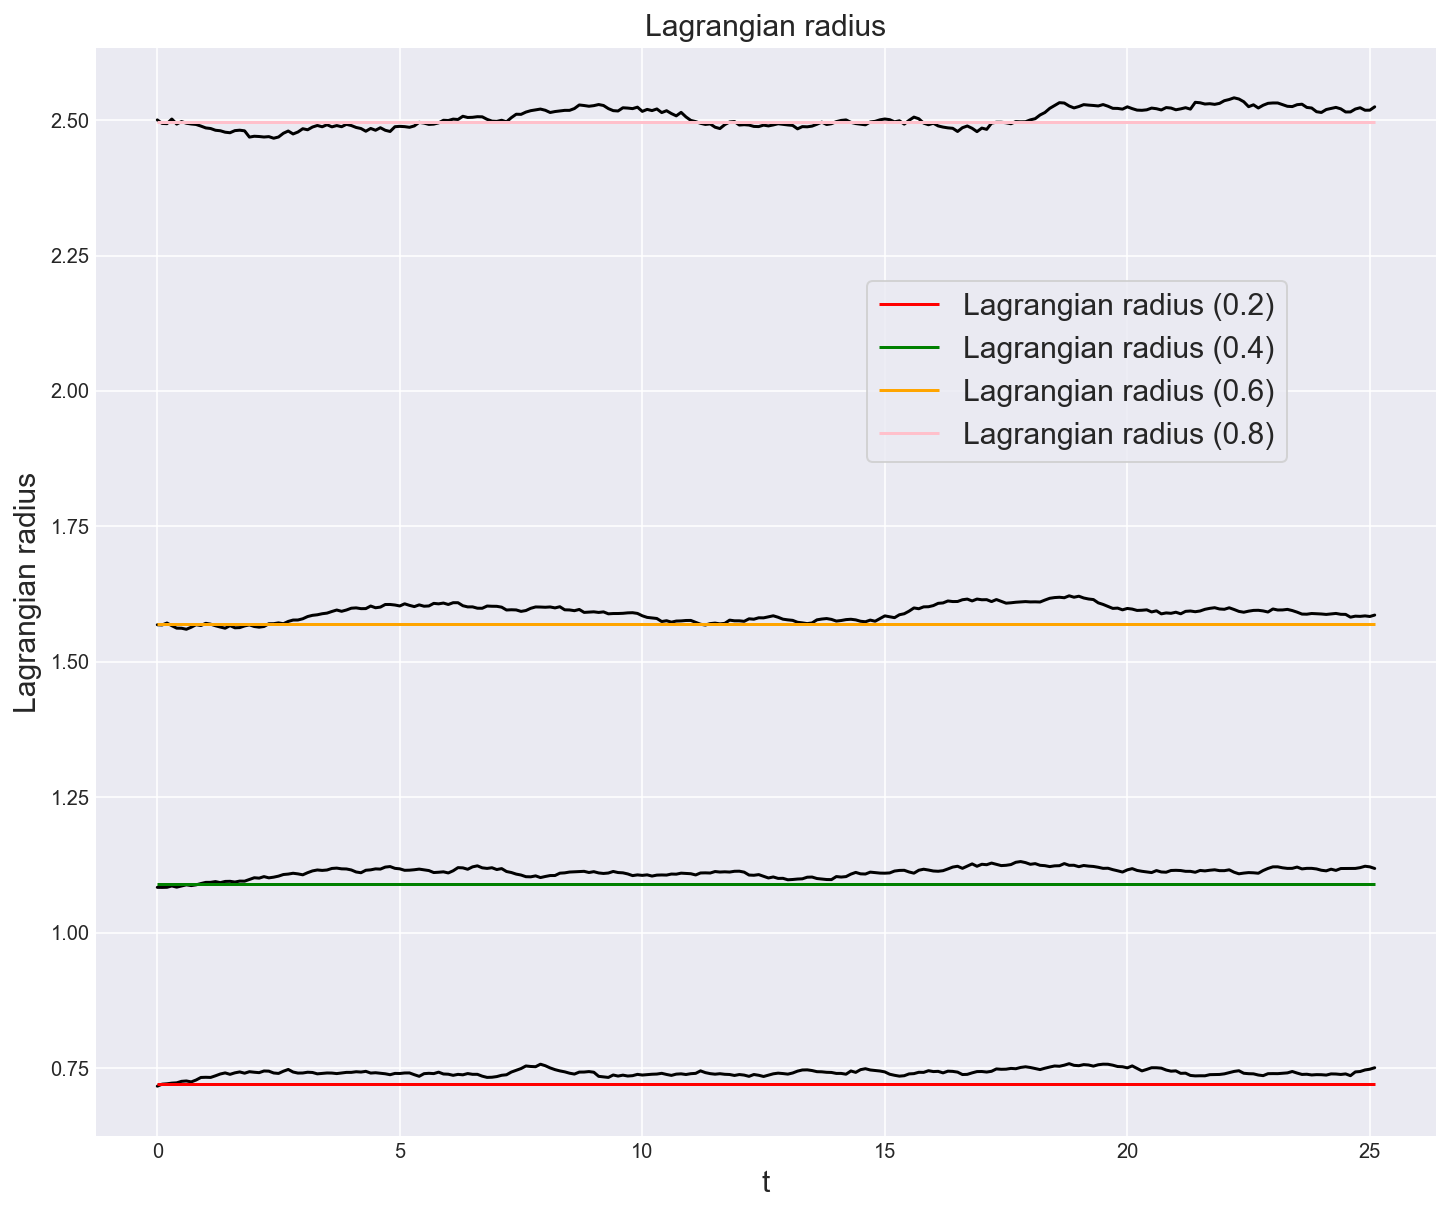

In [42]:
plt.figure(figsize=(12, 10))

c = ['red', 'green', 'orange', 'pink']

plt.plot(Time, b_2, 'black')
plt.plot(Time, b_4,'black')
plt.plot(Time, b_6, 'black')
plt.plot(Time, b_8, 'black')

plt.rcParams['figure.figsize']=[8,6]
plt.rcParams['font.size']=10

for j, i in zip([0.2, 0.4, 0.6, 0.8], range(0, 4)):
    
    plt.hlines(lagr_th(b, j), 0, np.max(Time), label=f'Lagrangian radius ({j})', color=c[i])
    

plt.ylabel("Lagrangian radius",fontsize=15)
plt.xlabel("t", fontsize=15)
plt.title("Lagrangian radius",fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.6, 0.4, 0.2), frameon = True, fontsize=15)
plt.show()

In [43]:
sigma_r = {}

for b_ in [b_2, b_4, b_6, b_8]:

    sigma_r[f"{b_}"] = [np.abs(lagr_th(b, 0.8) - b_[i])/lagr_th(b, 0.8) for i in range(0, len(Time))]

Here we plot the relative error with respect to the $\textit{ideal}$ Lagrangian radius:

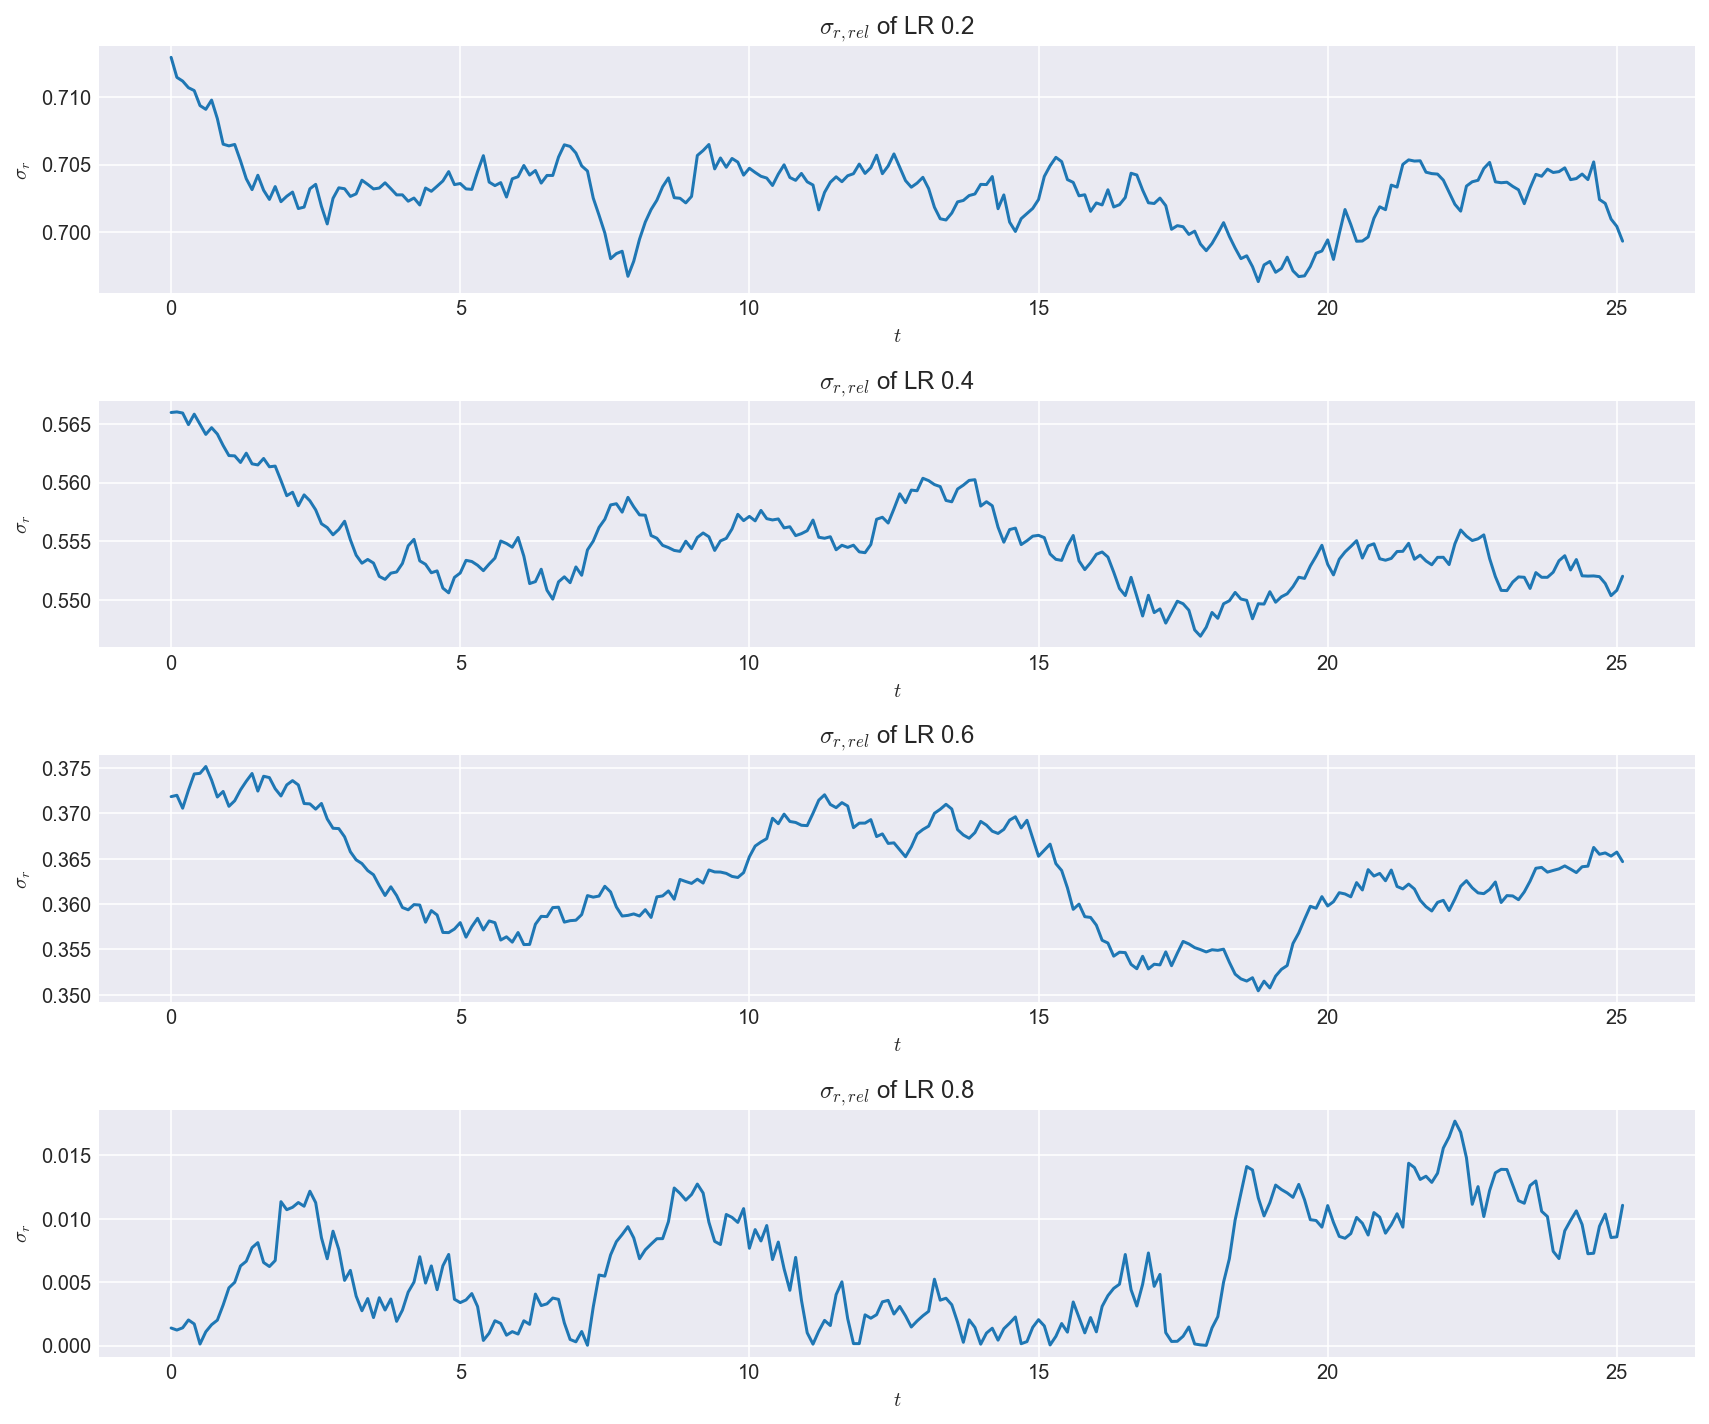

In [49]:
fig, ax = plt.subplots(4, figsize=(12, 10))

for i, b_, index in zip(range(0, 4), [b_2, b_4, b_6, b_8], [0.2, 0.4, 0.6, 0.8]): 

    ax[i].plot(Time, sigma_r[f"{b_}"] )
    ax[i].set_ylabel("$\sigma_{r}$")
    ax[i].set_xlabel("$t$")
    ax[i].set_title(f"$\sigma_{{r, rel}}$ of LR {index}")

plt.tight_layout()
plt.show()